<a href="https://colab.research.google.com/github/asifur12/asifur12.github.io/blob/main/used_cars_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as map
import seaborn as sns


# Problem set 3

##Problem 1

### **a**. Draw a scatter graph of 100 data points generated randomly from 2 normal distributions in the same figure. The first normal distribution has mean = 0 and standard deviation = 1 and the second has mean = 1 and standard deviation = 2.

In [28]:
#generating normal random data for two normal distribution
norm_1 = np.random.normal(0,1,100)
norm_2 = np.random.normal(1,2,100)
# here in parameter first one is for mean, then std last one size.


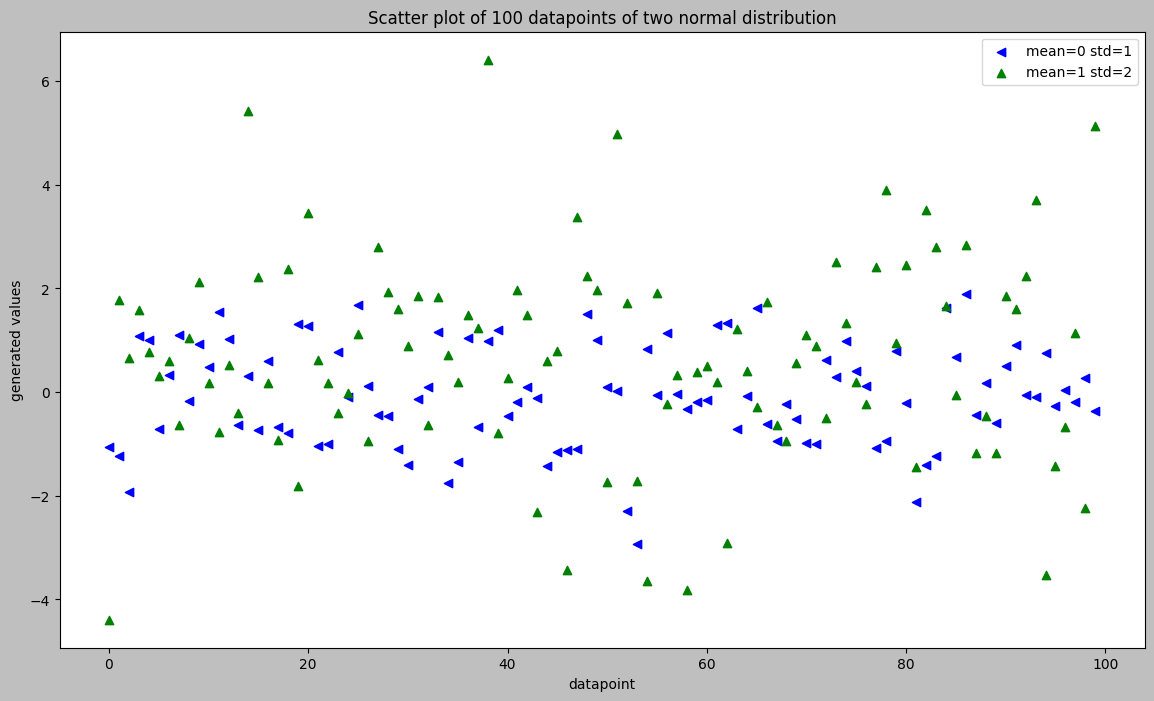

In [29]:
#Plotting the data
plt.style.use('grayscale')#graph style
plt.figure(figsize = (14,8)) # graph size
plt.scatter(range(100),norm_1, alpha = 1, marker='<', color = 'blue', label = 'mean=0 std=1') # plotting data of norm_1
plt.scatter(range(100), norm_2, alpha = 1, marker = '^', color = 'green', label = 'mean=1 std=2')# plotting data of norm_2
plt.title('Scatter plot of 100 datapoints of two normal distribution')
plt.xlabel('datapoint')
plt.ylabel('generated values')
plt.legend()
plt.show()


b. Draw a bar plot comparing two subject marks of Mathematics and Science in two subplots.
math_marks = [88, 92, 80, 89, 100, 80, 60, 100, 80, 34]
science_marks = [35, 79, 79, 48, 100, 88, 32, 45, 20, 30]
marks_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [30]:
math_marks = [88, 92, 80, 89, 100, 80, 60, 100, 80, 34]
science_marks = [35, 79, 79, 48, 100, 88, 32, 45, 20, 30]
marks_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

Text(0, 0.5, 'marks')

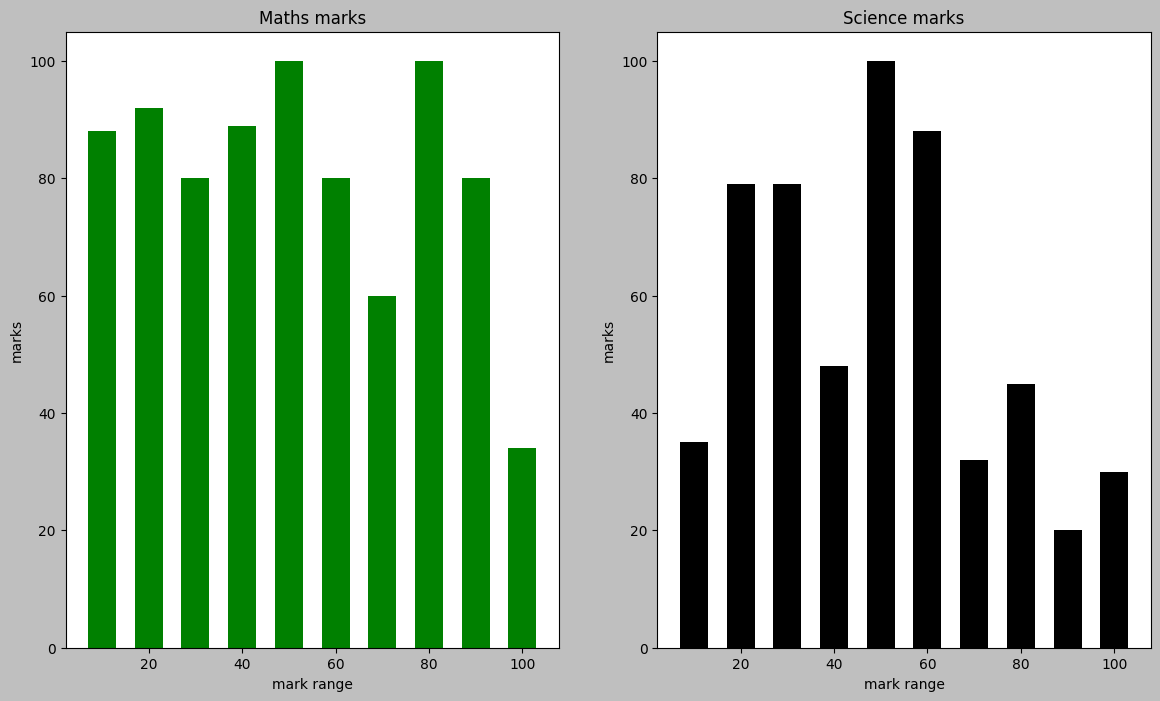

In [31]:
#setting up the subplots
fig, ax = plt.subplots(1,2, figsize = (14,8))
ax[0].bar(marks_range,math_marks, color = 'green', width = 6)
ax[0].set_title('Maths marks')
ax[0].set_xlabel('mark range')
ax[0].set_ylabel('marks')
ax[1].bar(marks_range, science_marks, color = 'black', width = 6)
ax[1].set_title('Science marks')
ax[1].set_xlabel('mark range')
ax[1].set_ylabel('marks')

##Problem 2:
Problem scenario: Paul wants to sell his car. But he doesn’t know how much hould he sell his car for! He wants to maximize the profit but he also wants it to be sold for a reasonable price. So, being a data scientist, we can help Paul.

### 1. Consider the data (used-cars), The dataset doesn’t contain any heading, so you need to consider the following headings for the columns.
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration","num-ofdoors", "body-style","drive-wheels", "engine-location", "wheel-base","length",
"width","height", "curb-weight", "engine-type","num-of-cylinders", "engine-size", "fuelsystem","bore","stroke", "compression-ratio", "horsepower", "peak-rpm", "citympg","highway-mpg","price"]

In [32]:
#reading the excel file of used car data
used_cars = pd.read_excel('/content/drive/MyDrive/Data_Science/Data_Analytics/Assingment/Datasets/used-cars.xlsx')
#showing the top 5 data
used_cars.head(5)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [33]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration","num-ofdoors", "body-style","drive-wheels", "engine-location", "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size", "fuelsystem","bore","stroke", "compression-ratio", "horsepower", "peak-rpm", "citympg","highway-mpg","price"]



In [34]:
for old_name, new_name  in zip(used_cars.columns, headers):
  used_cars.rename(columns ={old_name:new_name}, inplace = True)

In [35]:
used_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-ofdoors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuelsystem,bore,stroke,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. You need first to preprocess and clean the dataset to could make the good choice.

In [36]:
# checking for missing value
used_cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-ofdoors          0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuelsystem           0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
citympg              0
highway-mpg          0
price                0
dtype: int64

## There is no missing value

In [37]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-ofdoors        205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Normalized losses, price, horse power and some other columns are  supposed to be integer, but we can see here its object.

In [38]:
#checking shape of the dataset
used_cars.shape

(205, 26)

In [39]:
used_cars['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

### 41 values are **?** which we need to remove. but we only have around 200 values. so i will replace it with the median value of the data

In [40]:
# first i will fill the ? with nan
# converting this column to numeric
used_cars['normalized-losses'] = pd.to_numeric(used_cars['normalized-losses'], errors= 'coerce')

In [41]:
# lets check the data type of this column
used_cars['normalized-losses'].dtype

dtype('float64')

In [42]:
# also now we can see the "?" converted into NaN value
used_cars['normalized-losses'].isna().sum()

41

In [43]:
# replacing with the mean value
used_cars['normalized-losses'].fillna(used_cars['normalized-losses'].median(), inplace = True)

In [44]:
used_cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-ofdoors          0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuelsystem           0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
citympg              0
highway-mpg          0
price                0
dtype: int64

so now we dont have any missing value in the data


## price column also object . lets check on it

In [45]:
# Convert certain columns to numeric, coercing errors to NaN
columns_to_convert = [ 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
used_cars[columns_to_convert] = used_cars[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [46]:
# Fill missing numerical values with the median of their columns
num_columns_with_missing = [ 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
used_cars[num_columns_with_missing] = used_cars[num_columns_with_missing].fillna(used_cars[num_columns_with_missing].median())

##3. Show in the form of a graph the correlation between the price and other features from the data that can help Paul in buying his car.

In [47]:
numerical_columns = used_cars.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

<ipython-input-48-da528f09d9c9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_correlations.values, y=price_correlations.index, palette="viridis")


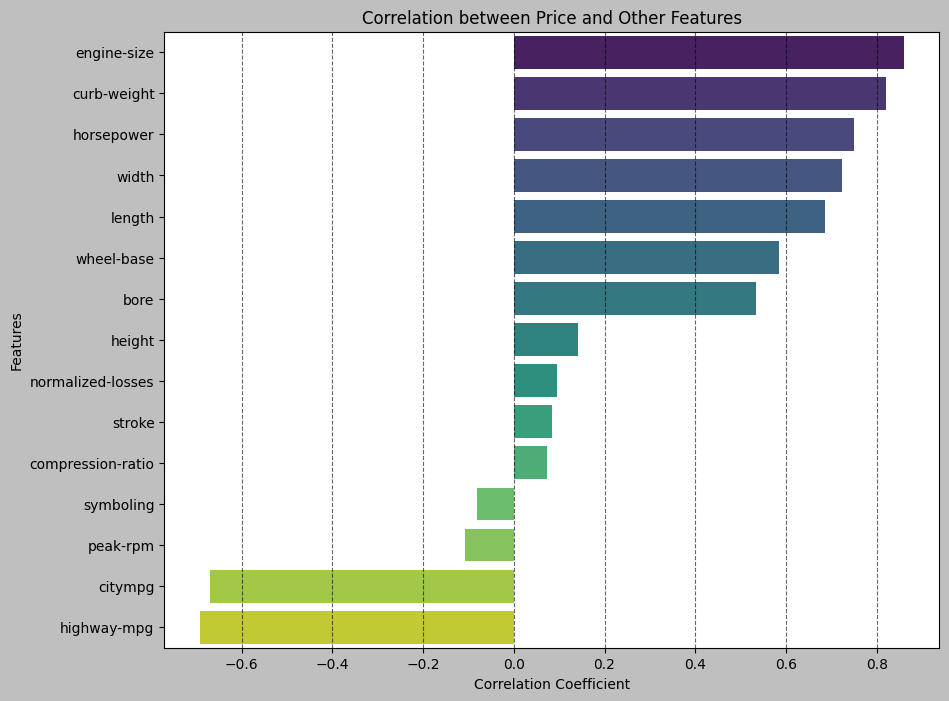

In [48]:
# Calculate correlation matrix
correlation_matrix = used_cars[numerical_columns].corr()

# Extract 'price' correlations, sort them for better visualization, and remove the price-price correlation
price_correlations = correlation_matrix['price'].sort_values(ascending=False).drop('price')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=price_correlations.values, y=price_correlations.index, palette="viridis")
plt.title('Correlation between Price and Other Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

### Engine size curb- weight horsepower and some other column are positivelu corralated with price and highway mpg and citympg are most negatively corralated with price

## 4. Group the data according to wheel, body-style and price. Draw a plot in function of the price and car style then make a conclusion.

In [49]:
used_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-ofdoors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuelsystem,bore,stroke,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [73]:
#grouping the data according to wheel, bodystyle and price
gr_style = used_cars.groupby(['body-style','wheel-base']).price.mean().reset_index()
g_wheel = used_cars.groupby(['body-style','wheel-base']).price.mean().reset_index()

In [79]:
# prompt: Using dataframe grouped_data: generate bar plot from gr_style

import altair as alt
alt.Chart(grouped_data).mark_bar().encode(x='body-style', y='price').properties(width=600)


alt.Chart(...)

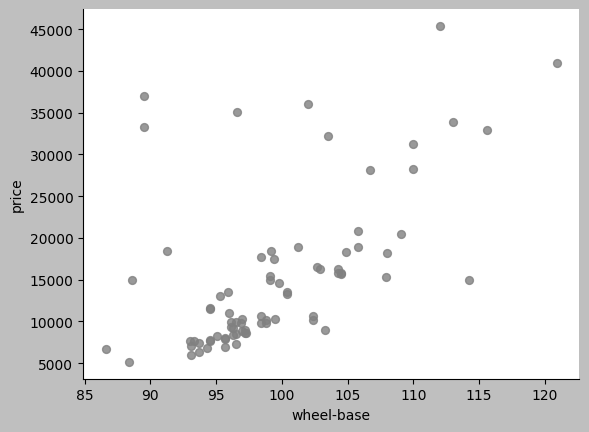

In [72]:
# @title wheel-base vs price

from matplotlib import pyplot as plt
grouped_data.plot(kind='scatter', x='wheel-base', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [75]:
import altair as alt

chart = alt.Chart(grouped_data).mark_line().encode(
    x = alt.X('wheel-base:Q'),
    y = alt.Y('price:Q'),
    color = alt.Color('body-style:N')
).properties(
    width=600,
    height=400
)

chart


alt.Chart(...)

### We can colclude here that hardtop and sedan car style price increase as the wheel size increase . for luxary car its varies.